# BEEM011 Assignment 2023

### Instructions

#### Summative assessment
Direction: This Assignment consists of 2 questions. There are 100 marks in total. 

For each question, 5% of marks are reserved for evidence of best practice in R coding, marks for sub-questions therefore add up to 95 of the 100 total marks for the assignment.

Unless otherwise stated you should use a 5% significance level for hypothesis tests.

Answer all the questions and upload your Jupyter Notebook and a PDF copy to the ELE2 submission point. 

#### WRITE YOUR R CODE AND ANSWERS FOR ALL OF THE QUESTIONS IN THIS JUPYTER NOTEBOOK.  PLEASE INCLUDE YOUR CANDIDATE NUMBER IN A COMMENT AT THE TOP OF YOUR CODE.


#### DO NOT PUT YOUR NAME ANYWHERE IN THE ASSIGNMENT.


Make sure to include your Jupyter Notebook file (.ipynb) as an upload to your submission. Please comment on each procedure to explain what you are doing (or intend to do). Submission is via ELE2.
Submission of an incorrect filetype will result in the deduction of marks.

Read and answer each of the questions using your own code and words.  

Collaboration with others and plagiarism of other people's code is not permitted. Presenting someone else's code as your own work is misrepresentation, an academic conduct offence.


For the assignment I am not expecting you to use packages outside of what we have learnt in class. If you use additional packages I expect you to explain why, demonstrate your understanding of how they are functioning and justify why you need this package.

We have covered the following packages in the libraries:

- readxl

- AER

- sandwich

- MASS

- margins

- stargazer

- plm

- ggplot2

- haven

- psych

Some people will also have used the following packages for installation:

- base

- devtool

In [2]:
library(AER)
library(plm)
library(ggplot2)
library(stargazer)
library(sandwich)

Warning message:
"package 'AER' was built under R version 3.6.3"
Loading required package: car

Warning message:
"package 'car' was built under R version 3.6.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 3.6.3"
Loading required package: lmtest

Warning message:
"package 'lmtest' was built under R version 3.6.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 3.6.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 3.6.3"
Loading required package: survival

Warning message:
"package 'survival' was built under R version 3.6.3"
Warning message:
"package 'plm' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'stargazer' was built under R version 3.6.3"

Pleas



# Question 1: Probability

The average yields per hectare for cereal crops in the UK are normally distributed with mean 3,500 tonnes per hectare and standard deviation 2,500 tonnes.

Any crop whose yield is greater than 5,000 tonnes is defined as being productive.

a) Define the mean and standard deviation of the distribution as variables in R [2 marks]

In [3]:
#assigning mean and sd to veriables 
mean_yield <- 3500
sd_yield <- 2500 

b) Write down the probability that a randomly selected/sampled crop is productive and use R to calculate this probability using the standard normal transformation. [4 marks]

In [4]:
productive_yield <- 5000

#Calculate the Z-score
#Z=(X-MEAN)/SD
Zscore <- (productive_yield - mean_yield)/sd_yield

#finds cumulative distribution fuction of the standard normal distribtuion
# -1 used to find the left tail of distribtuion
prob_productive <- 1 - pnorm(Zscore)

cat('Probability of sampled crop being poductive:', prob_productive)

Probability of sampled crop being poductive: 0.2742531

c) Write down the probability that a randomly selected crop yields more than 6,500 tonnes per hectare annually and use R to calculate this probability. [4 marks]

In [5]:
#Similar to b), however changing X to 6500
Zscore1 <- (6500 - mean_yield)/sd_yield

prob_greater_6500 <- 1 - pnorm(Zscore1)

cat('Probability of sampled crop being greater than 6500:', prob_greater_6500)

Probability of sampled crop being greater than 6500: 0.1150697

d) A crop is chosen at random. Given that the crop is productive, write down an equation for calculating the probability that the yield for this crop is greater than 6,500 tonnes.
You should use $P(A | B), P(B | A)$ and $P(A \cap B)$ in your equation where:

A = crop is productive (exceeds 5,000 tonnes per year)

B = crop yield exceeds 6,500 tonnes per year

[5 marks]

By definition, the joint probability P(A∩B) is the probability of both A and B occurring. If you consider all possible outcomes where A occurs, the fraction of those outcomes where B also occurs is exactly the conditional probability of B given A. The formula rearranges the proportionate relationship between P(A∩B) and P(A). Mathematically, this is expressed as P(A∩B)=P(A)×P(B∣A). This equation states that the probability of both A and B occurring is the product of the probability of A and the conditional probability of B given A. To find P(B∣A), we rearrange this equation to isolate it: 
​
$$ P(B∣A)= P(A∩B)/P(A) $$




e) Use R to calculate the probability that the yield for this randomly chosen crop is greater than 6,500 tonnes.  Round your result to two decimal places. [2 marks]

In [6]:
conditional_prob <- prob_greater_6500 / prob_productive
conditional_prob_rounded <- round(conditional_prob, 2)
cat('Probability that random selcted crop is greater than 6,500 tonnes:', conditional_prob_rounded, '\n')


Probability that random selcted crop is greater than 6,500 tonnes: 0.42 


f) A researcher has collected data on a sample of 105 new genetically modified (GM) cereal crops.  The sample mean of the yields is 3,900 tonnes per hectare and the sample standard deviation is 2,100 tonnes per hectare. 

Test the null hypothesis that the genetically modified (GM) cereal crops have a population mean yield equal to that of the UK cereal crops in part a) against the alternative hypothesis that the GM crops have a higher population mean yield. Use a 5% significance level. [5 marks]

Answer

Ybar denots the mean GM cereal crops, sy denotes standard deviation, n is sample size, alpha is the sginficicance level.

$$ \bar y = 3900 $$

$$ s_y = 2100 $$

$$n = 105 $$

Null hypothesis design:

$$ H_0: μ_GY >= μ_UK, $$

$$ H_1: μ_GY > μ_UK $$ 

$$ α = 0.05 $$

$$ t-value = (\bar y - μ^0_Y)/(s_y / √n) $$

$$ t_{crit} = ± qnorm(α) $$

$$ |t-value|>|t_{crit}| $$


In [7]:
mean_null <- 3500 
n <- 105
ybar <- 3900
sy <- 2100
alpha <- 0.05

#calcaulate the t_statistic
t_stat <- (ybar - mean_null) / (sy / sqrt(n))

#calculate the critical range under a 0.05 significance level 
t_crit <- qt(0.95, df = n - 1) # Right-tailed test

#degree of freedom 
deg_freedom <- n - 1 


cat('Upper critcal value:', t_crit, '\n')
cat('T-statistic:', t_stat, '\n')
cat('Degrees of freedom:', deg_freedom, '\n')

#if stament to determine weather to reject/fail to reject null
#if absolute t-statistc is larger than the absolute critical value we reject null
if (abs(t_stat)>abs(t_crit)) {
    print('Reject null hypothesis')
} else {
    print('Fail to reject null hypothesis')
}

Upper critcal value: 1.659637 
T-statistic: 1.9518 
Degrees of freedom: 104 
[1] "Reject null hypothesis"


g) Calculate the p-value for this test statistic and provide an interpretation of what this means. [3 marks]

In [8]:
#calculating p value 
p_value <- 1 - pt(t_stat, df = deg_freedom)

cat('P-Value:', p_value,'\n')

P-Value: 0.02682557 


Answer

## Question 2 2023

The Salary Gap data set (salarydata.csv) contains data on salaries for a sample of individuals between 2001 and 2020.  The variables in the data set include:
- Salary: the annual salary of the individual before tax in British pounds (GBP)
- Age: the age of the individual
- Duration: The number of years an individual has spent in their current job
- Gender: Self reported gender (Male, Female, Non-binary)
- Children: The number of children (aged under 16) that the individual has parental rights for

### Part 1: Explore the data

a) Load the Salary Gap csv and assign it to an object labelled *salarydata* [2 marks]

In [9]:
library(AER)
library(plm)
library(ggplot2)
library(stargazer)

In [10]:
#reading .csv file and displaying first 10 
salarydata <- read.csv('salarydata.csv')
head(salarydata, n=10 ) 


X,salary,id,gender,children,duration,year,age
1,64579.25,1,Male,4,1,2001,34
2,105744.16,2,Female,1,1,2001,59
3,503045.35,3,Non-binary,5,19,2001,40
4,55883.94,4,Male,4,1,2001,64
5,25459.80,5,Non-binary,3,1,2001,67
6,66364.26,6,Male,3,1,2001,21
7,15348.96,7,Female,3,1,2001,46
8,15793.02,8,Male,3,6,2001,65
9,31487.19,9,Non-binary,3,1,2001,47
10,19616.68,10,Female,4,15,2001,42


b) Check whether the panel is balanced?  Explain the method you have used. [4 marks]

In [11]:
#Using the plm package
#Comaring the indexes id and year to ensure they have the same amount of entities
is_balanced <- is.pbalanced(salarydata, index = c('id','year'))

#if statement to print balanced/ not balanced
if (is_balanced == TRUE) {
    cat('Panel is balanced\n')
}else {
        cat('Panel is not balanced\n')
}

Panel is balanced


c) Look at the data.  What type of data is the gender variable loaded as? [ 2 marks]

Convert the gender variable to a factor variable and set the base level to Male. [2 marks]

In [12]:
#Finding data type
class(salarydata$gender)

#Assigning gender variables as factor
salarydata$gender <- factor(salarydata$gender, levels = c('Male', 'Female', 'Non-binary'))
gender_data_type <- class(salarydata$gender)
print(paste("Data type of 'Gender' variable: ", gender_data_type))


[1] "factor"

[1] "Data type of 'Gender' variable:  factor"


d) Using histograms, plot the distribution of salaries for males, females and non-binary individuals in the sample in 2020.  Describe the distributions. [10 marks]

*Note: functions like ggplot2 don't like panel data frame structures*

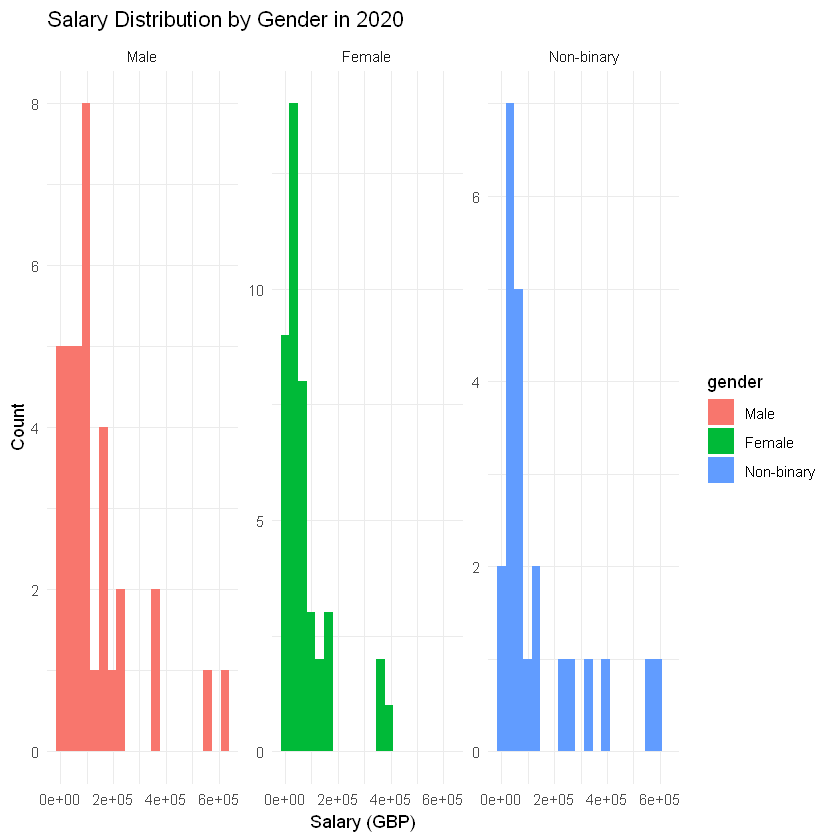

In [13]:
# Filter the data for the year 2020
data_2020 <- subset(salarydata, year == 2020, select = c("salary", "gender"))

# Create histograms
ggplot(data_2020, aes(x = salary, fill = gender)) +  #specifies the structure of the plot by setting salary to x-axis and gender to y-axis
  geom_histogram(bins = 20, position = "identity", alpha = 1) + #sets the size and gama of the plot, also sets actual values of salary
  facet_wrap(~gender, scales = "free_y") + #sets different facets for each category of data
  labs(title = "Salary Distribution by Gender in 2020", #sets the plot labels
       x = "Salary (GBP)",
       y = "Count") +
  theme_minimal() #sets aminimal theme

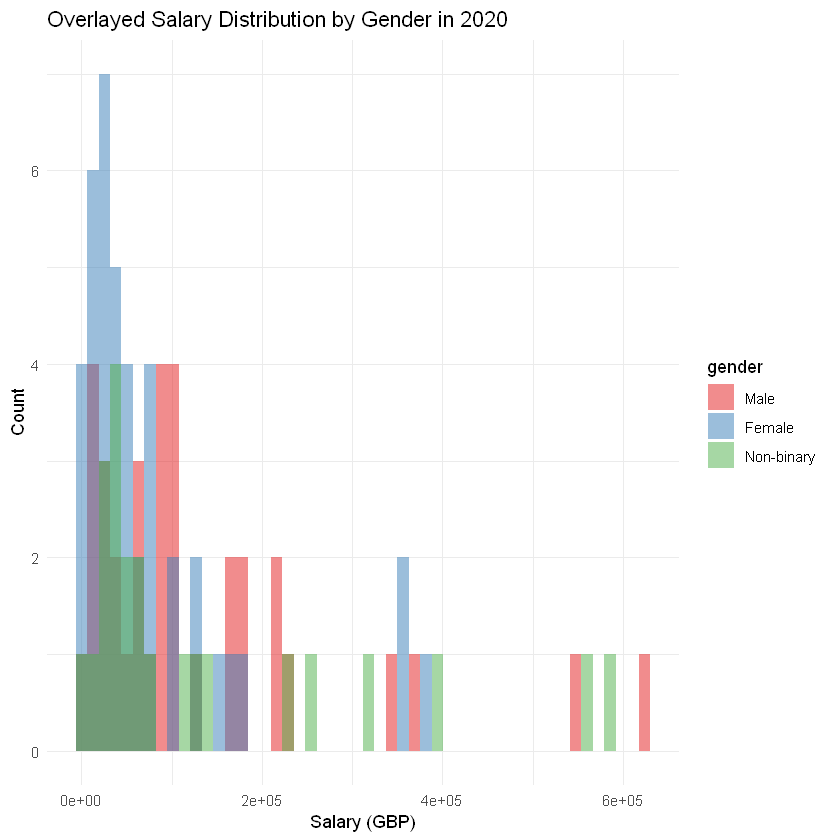

In [14]:
ggplot(data_2020, aes(x = salary, fill = gender)) +
  geom_histogram(bins = 50, position = "identity", alpha = 0.5) +
  labs(title = "Overlayed Salary Distribution by Gender in 2020",
       x = "Salary (GBP)",
       y = "Count") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")

It appears that the wage distributions for all three categories are skewed to the right, meaning that most people make their living on the lower end of the pay range, while a smaller percentage make more money. For every gender, there is a significant salary disparity, indicating a vast range of income levels. The largest freqeuncy near the average is female whearas non-binary and male are more present at the higher end of income.

### Part 2: Cross section analysis


a) Set the seed to your candidate number. [1 mark]

Use R to randomly select a year from between 2001 and 2020.  Report which year was selected.

Create a subset of the data called *mysubset* for the selected year. [3 marks]

*Note: You should verify that the sample has been correctly constructed by inspecting *mysubset* after you create it.*



In [15]:
set.seed(730093239) #sets seed to ranomdly generate number which ensures the code is reproducable

year_selected <- sample(2001:2020, 1) #sets a sample for a year between 2001 and 2020 (2004 in this case)

cat('Random year selected:', year_selected, '\n')

mysubset <- salarydata[salarydata$year == year_selected, ] #create subset with only data from the selected year

head(mysubset)
tail(mysubset)

mysubset$gender <- factor(mysubset$gender, levels = c("Female", "Male", "Non-binary")) #reassigns the order of genders

Random year selected: 2004 


,X,salary,id,gender,children,duration,year,age
301,301,17294.45,1,Male,5,1,2004,37
302,302,62776.28,2,Female,2,1,2004,62
303,303,27895.95,3,Non-binary,4,2,2004,43
304,304,53532.72,4,Male,5,2,2004,67
305,305,42870.57,5,Non-binary,5,1,2004,70
306,306,101356.20,6,Male,5,2,2004,24


,X,salary,id,gender,children,duration,year,age
395,395,8837.319,95,Female,4,3,2004,38
396,396,36660.392,96,Female,3,3,2004,32
397,397,61385.155,97,Female,5,3,2004,62
398,398,85173.592,98,Non-binary,3,1,2004,27
399,399,48775.860,99,Male,4,1,2004,46
400,400,15268.879,100,Male,4,5,2004,48


You want to explore whether there is evidence of a salary gap between people of different genders.  Given the distributions of salaries in the sample you decide to estimate the following model:

$$ log(salary_i) = \beta_0 + \beta_1 Age_i + \beta_2 Duration_i + \beta_3 Female_i + \beta_4 Nonbinary_i + u_i ,$$

where $Female_i$ is an indicator variable equal to 1 if the individual self reported as female and 0 otherwise, and $Nonbinary$ is an indicator variable equal to 1 if the individual self reported as nonbinary and 0 otherwise.

b) Explain why an indicator variable for Male is not included in the model [3 marks]


When a categorical variable in a regression model has more than one level (e.g., gender with Male, Female, and Non-binary), one level is usually excluded as the "reference category." The intercept term (β0) implicitly represents this reference category. 


c) Using the data set *mysubset*, estimate the model. [3 marks]


In [16]:
mysubset$Female <- as.numeric(mysubset$gender == "Female")
mysubset$Nonbinary <- as.numeric(mysubset$gender == "Non-binary")


reg <- lm(log(salary) ~ age + duration + Female + Nonbinary, data = mysubset) #conducting a multiple regression as denoted above
            
#Define robust SE, using the heteroscedasticity-robust method

robust <- sqrt(diag(vcovHC(reg, 'HC1'))) 

#summary regresion table using stargazer package
stargazer(reg,type = 'text', se = list(robust))


                        Dependent variable:    
                    ---------------------------
                            log(salary)        
-----------------------------------------------
age                           0.015*           
                              (0.008)          
                                               
duration                       0.025           
                              (0.018)          
                                               
Female                       -0.773***         
                              (0.262)          
                                               
Nonbinary                      0.069           
                              (0.289)          
                                               
Constant                     10.322***         
                              (0.390)          
                                               
-----------------------------------------------
Observations                    100    

d) How do you interpret the coefficient on duration and its significance? [4 marks]


TheThis variable shows a coefficient of 0.025 which means for every unit incrrase in duration log(salary) is expectdd to rise by 0.025, but the lack of asterisks indicates that this is not statistically significant.

e) Do you find any evidence of a difference in the mean salaries for people of different genders? [4 marks]


This coefficient is statistically significant at the 1% level (as indicated by ***). The magnitude of the coefficient (-0.773) suggests a substantial decrease in log(salary) for females, which translates to a significant decrease in salary.

The coefficient for nonbinary individuals is not statistically significant, as indicated by the lack of asterisks. This means we do not have enough evidence from this sample to conclude that the mean salary for nonbinary individuals is different from the baseline category.


f) The variable children was not included in the model. Explain how this might affect your results? Does your data provide any information about this? [6 marks]

Including children into the regression could have an influence on salary patterns behaviours as people with or without children may have different salaries. A higher number of children could mean that salary would be higher as these individuals require more disposable income to support their families. However, on the other hand, higher income indivudals may have less kids as they are more work-focused and therefore do not have time to start larger families. These factors could have an impact on the results. Addtionally, Reducing omitted veriable biases could also have an effect on the regression outcome, if children has an impact on the other variables, the inclusion of children in this case would reduce coefficient estimation bias. Finally, the inclusion of children could expalin certain gender behaviours such as women being more likely to undetake caregiving roles, these could effect their career choices and thus impact their salary.

g) Re-estimate the model with the addition of children as a regressor.  Explain whether your interpretation of the results has changed [5 marks]

In [17]:

reg1 <- lm(log(salary)~age + duration+ Female + Nonbinary + children, data = mysubset)

#Define robust SE

robust <- sqrt(diag(vcovHC(reg, 'HC1')))

stargazer(reg1,type = 'text', se = list(robust))


                        Dependent variable:    
                    ---------------------------
                            log(salary)        
-----------------------------------------------
age                           0.016**          
                              (0.008)          
                                               
duration                       0.023           
                              (0.018)          
                                               
Female                       -0.796***         
                              (0.262)          
                                               
Nonbinary                      0.002           
                              (0.289)          
                                               
children                      -0.110           
                                               
                                               
Constant                     10.692***         
                              (0.390)  

The coefficient for "children" is negative, indicating that people with children typically earn less in log wage than people without children. The p-value, however, is higher than the typical significance limit of 0.05 at 0.084001. Meanng it is not statistically significant. 

The coefficient for 'genderFemale' has shifted from -0.773 to -0.796, indicating a decrease in the average log pay of women compared to men after adjusting for the presence of children.



### Part 3: Panel data analysis [21 marks]

a) Explain the advantage of using the full panel of data from 2001 to 2020 for your analysis [2 marks]


Longitudinal studies enable us to inspect populations and how they change over a period of time, at regular intervals, this allows control over veriables as well as accounts for demographic and social changes. With the use of 2001-2020 data there is an increased sample size which leads to greater degrees of accuracy, which helps with representing the population comprehensivley.


b) Why would you want to include entity and time fixed effects? [3 marks]


The inclusion of entity and time fixed effects in a panel data model enhances the credibility of causal inferences by controlling for unobserved individual differences and common temporal shocks. Regressions on cross sectional data often experience omited variable bias, with the use of entity and time fixed effects these biases can be reduced.

c) Write down a panel linear model with entity and time fixed effects.  The model should express the log of salary as a function of age, duration, children and an interaction between gender and children.  [4 marks]






$$ \log(salary_{it}) = α +  β_1age_{it} + β_2duration_{it} + β_3children_{it} + β_4(gender_{it} * children_{it}) + λ_i + γ_t + μ_{it} $$



d) Explain how the interaction between gender and children influences the expected change in salary for individuals with one additional child. [3 marks]

The interaction terms in the model capture how the relationship between the number of children and salary differs based on gender. For males the expected change in salary based on childr3en is represneted through the children coefficenint. 

e) Estimate the model using the full salarydata dataset and interpret the coefficients on regressors related to gender and children. [2 marks]

In [18]:


# Estimating the model
pmodel <- plm(log(salary) ~ age + duration + children + gender* children, 
              data = salarydata, 
              index = c("id", "year"), 
              model = "within")

stargazer(pmodel,type = 'text', se = list(robust))


                              Dependent variable:    
                          ---------------------------
                                  log(salary)        
-----------------------------------------------------
age                                  0.003           
                                    (0.008)          
                                                     
duration                             0.012           
                                    (0.018)          
                                                     
children                           -0.043**          
                                                     
                                                     
children:genderFemale               -0.171           
                                                     
                                                     
children:genderNon-binary           -0.030           
                                                     
                           

Answer

f) Explain how you would test the null hypothesis that there is no gender based salary gap.  Clearly explain your null and alternative hypothesis, the test statistic, significance level and rejection rule. [5 marks]


$$ H_0: \beta_{Female} = \beta_{ Nonbinary} = \beta_{Female:Children} = \beta_{Nonbinary:Children}  = 0 $$

$$ H1: \beta_{Female} != \beta_{ Nonbinary} != \beta_{Female:Children} != \beta_{Nonbinary:Children}  != 0 $$

$$ α = 0.05 $$

$$ t-value = (\bar y - μ^0_Y)/(s_y / √n) $$

$$ t_{crit} = ± qnorm(α) $$

$$ |t-value| != |t_{crit}| $$


g) Conduct the hypothesis test and discuss your conclusions.  [2 marks]

In [19]:
hypothesis <- c('age', 'duration', 'gender' )

hypothesis_test <- linearHypothesis(pmodel, hypothesis, vcov. = vcovHC(pmodel, type = "HC1"))
print(hypothesis_test)

Warning message in constants(lhs, cnames_symb):
"NAs introduced by coercion"


ERROR: Error in constants(lhs, cnames_symb): The hypothesis "gender" is not well formed: contains bad coefficient/variable names.


Answer